In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from twython import Twython
import keys #twitter keys: APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET

In [2]:
# twython auth
twitter = Twython(keys.APP_KEY, keys.APP_SECRET,keys.OAUTH_TOKEN, keys.OAUTH_TOKEN_SECRET)

In [3]:
# init empty lists to save tweets and metadata
user_ids, user_names, texts , creation, retweets ,favorites, lenguage, retweet, retweet_from, in_reply = ([] for i in range(10))
# get following IDs and NAMES (can get more info of users if needed!)
following_ids = [] # to save ids
following_names= {} # dictinary key:user_id, value: user_name
following = twitter.get_friends_list()
for u in following["users"]:
    following_ids.append(u['id'])
    following_names[u['id']]=u['name']

# get 200 tweets and metadata from each friend (can get more metadata if needed!)
for user_id in following_ids:
    tweets200 = twitter.get_user_timeline(user_id=user_id,count=200)
    for t in tweets200:
        user_ids.append(user_id)
        user_names.append(following_names[user_id])
        texts.append(t["text"])
        creation.append(t["created_at"])
        retweets.append(t["retweet_count"])
        favorites.append(t["favorite_count"])
        lenguage.append(t["lang"])
        in_reply.append(t['in_reply_to_screen_name'])
        retweet.append(('retweeted_status') in t)
        if ('retweeted_status') in t:
            retweet_from.append(t['retweeted_status']['user']['name'])
        else:
            retweet_from.append("N/A")

In [4]:
# create final DataFrame
mytweets = pd.DataFrame({'user_id':user_ids,'user_name':user_names, 'text':texts ,'retweet': retweet, 'creation':creation ,
              'retweets':retweets , 'favorites':favorites , 'lenguage':lenguage,'retweet_from': retweet_from,
              'in_reply':in_reply})
mytweets["in_reply"] = mytweets["in_reply"].map(lambda x: "None" if x is None else x) # fix in_replay column None type to "None"

In [25]:
# checks
print("size:", mytweets.shape, "\n------------------------") #size
print(mytweets.isnull().sum()) #column names $missing values 
print("\nreplies and retweets at the same time:",end=" ")
print(mytweets[(mytweets["in_reply"]!="None") & (mytweets["retweet"]==True)].size)

size: (3448, 10) 
------------------------
creation        0
favorites       0
in_reply        0
lenguage        0
retweet         0
retweet_from    0
retweets        0
text            0
user_id         0
user_name       0
dtype: int64

replies and retweets at the same time: 0


0    retweet
1    retweet
2      reply
3    retweet
4    retweet
dtype: object


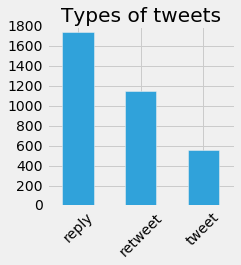

In [50]:
# Home many of all tweets are regular, tweeet, reply
def tweet_type(row):
    if row.retweet == True:
        return "retweet"
    elif row.in_reply == "None":
        return "reply"
    else:
        return "tweet"
# are there any replies and retweets?
a = mytweets.apply(tweet_type,1)
print(a.head())
fig=plt.figure(figsize=(3,3))
a.value_counts().plot(kind='bar')
plt.title("Types of tweets")
plt.xticks(rotation=45)
plt.show()

In [8]:
mytweets.in_reply.value_counts()[:1]

None    2893
Name: in_reply, dtype: int64

In [9]:
mytweets.retweet.value_counts()

False    2294
True     1154
Name: retweet, dtype: int64

In [14]:
mytweets[(mytweets["in_reply"]!="None") & (mytweets["retweet"]==True)].size

0

In [26]:
mytweets.head()

,creation,favorites,in_reply,lenguage,retweet,retweet_from,retweets,text,user_id,user_name
0,Fri Dec 23 02:22:09 +0000 2016,0,None,en,True,Ted Ullyot,75,"RT @tullyot: From the @a16z Policy team, here'...",2529971,Chris Dixon
1,Wed Dec 21 17:38:21 +0000 2016,0,None,en,True,Max Roser,3438,RT @MaxCRoser: I have written a short history ...,2529971,Chris Dixon
2,Wed Dec 21 02:31:32 +0000 2016,277,None,en,False,N/A,209,"Zuckerberg: ""AI is both closer and farther off...",2529971,Chris Dixon
3,Tue Dec 13 18:38:25 +0000 2016,0,None,en,True,WIRED,142,RT @WIRED: Google is putting its weight behind...,2529971,Chris Dixon
4,Tue Dec 13 16:16:09 +0000 2016,0,None,en,True,Rok Strniša,54,RT @RokStrnisa: A massive day for @Improbablei...,2529971,Chris Dixon
